In [16]:
# Inherited: `data` 
%run "C:\Users\Asus\Desktop\Coding\API_Flask\side_BenckMark\embedding_Workspace\bench\2_Preprocess.ipynb" 

In [19]:
from openai.embeddings_utils import cosine_similarity, get_embedding
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import classification_report

              precision    recall  f1-score   support

    negative       0.62      0.88      0.73       136
    positive       0.98      0.90      0.94       789

    accuracy                           0.90       925
   macro avg       0.80      0.89      0.83       925
weighted avg       0.92      0.90      0.91       925



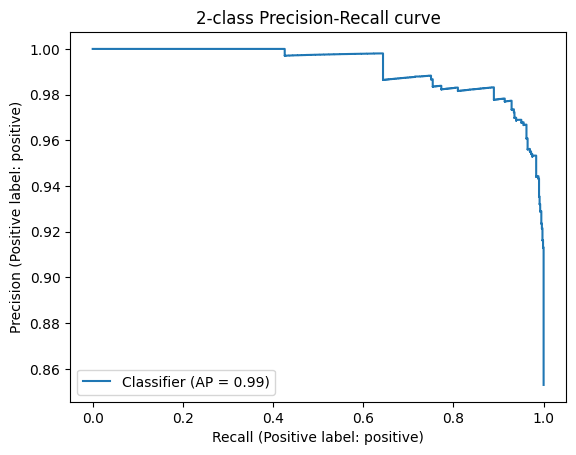

In [20]:
def evaluate_embeddings_approach(
    labels = ['negative', 'positive'], 
    model = embedding_Model,
):
    label_embeddings = [get_embedding(label, engine=model) for label in labels]

    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = data["embedding"].apply(lambda x: label_score(x, label_embeddings))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(data.sentiment, preds)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(data.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach(labels=['negative', 'positive'], model=embedding_Model)